In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from commons import *

In [5]:
sns.set_style('white')
pd.set_option('max_colwidth',300)

In [11]:
df = pd.read_parquet(r"datasets\job_title_dataset.parquet")

### Let's take a look on the dataset

In [14]:
df.shape

(31427, 5)

In [15]:
df.sample(5)

,JobId,JobTitleId,ExtJobTitleText,JobTitle,Description
24821,464734198,401442,1706 - Inventory Control & Assurance Shift Lead,Inventory Manager,"<p><strong>Location: Franklin, MA</strong></p><p><br></p><p><strong>IN A NUTSHELL…</strong></p><p>This role is to help drive the teams towards the day’s goals and help them prioritize or switch gears when necessary. </p><p>This person will be responsible for the work completed during the shift. ..."
12280,354116136,401616,Commercial Class B Driver,Class B Driver,"<p>Centerline is your one access point to limitless truck driving opportunities.&#160; Our job is to connect you with safe, rewarding work at top companies while maintaining your flexibility and work / life balance.</p>\n<p>Text the word DRIVE to (510) 256-9546&#160;or call for more information!..."
30836,492308480,402951,Marketing Automation Lead,Automation Manager,"Well known healthcare organization looking for Marketing Automation Lead for a 6 month contract with possible extension, full time hours remote (should be on EST). <br> <strong>Marketing Automation Lead Responsibilities:</strong><br> <ul> <li>The Marketing Automation Lead develops and executes m..."
25365,465688913,400736,Licensed Utah Electricians - Hire On Bonus!,Electrician,"<p>$1000 HIRE ON BONUS!</p><p>360 Industrial Services is seeking licensed Utah electricians for a project around Salt Lake City, Utah. This is a commercial project requiring conduit runs, wire pull, switches, lighting, panels, terminations, troubleshooting and more.</p><p>Pay: up to 36/hr<br>Per..."
27301,476412754,405636,School Psychologist,School Psychologist,"<p>We&rsquo;re looking for an exceptional School Psychologist for a full-time position in Lockport, IL for the 2021-2022 School year. This role is responsible for facilitating problem-solving meetings, initial case studies, reevaluations, working with small groups of children, etc. The caseload ..."


#### The JobId columnn looks unique, let's check it

In [16]:
df[df.JobId.duplicated()]

,JobId,JobTitleId,ExtJobTitleText,JobTitle,Description


#### So if the column is without duplicates, let's drop it and use the index column we got automatically

In [17]:
df.drop(columns='JobId', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31427 entries, 0 to 31426
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   JobTitleId       31427 non-null  int32 
 1   ExtJobTitleText  31427 non-null  object
 2   JobTitle         31427 non-null  object
 3   Description      31426 non-null  object
dtypes: int32(1), object(3)
memory usage: 859.5+ KB


#### One NA, dropping it

In [19]:
df.dropna(inplace=True)
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31426 entries, 0 to 31426
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   JobTitleId       31426 non-null  int32 
 1   ExtJobTitleText  31426 non-null  object
 2   JobTitle         31426 non-null  object
 3   Description      31426 non-null  object
dtypes: int32(1), object(3)
memory usage: 1.1+ MB


#### We want to see if there are rows with empty discription

In [20]:
df[(df.Description == 'None') | (df.Description == '')]

,JobTitleId,ExtJobTitleText,JobTitle,Description


#### Count unique values for each column

In [23]:
def count_unique(data):
    for col in data.columns:
        print (f" In the '{col}' column there are: {data[col].nunique()} unique values")

In [24]:
count_unique(df)

 In the 'JobTitleId' column there are: 1954 unique values
 In the 'ExtJobTitleText' column there are: 13990 unique values
 In the 'JobTitle' column there are: 1954 unique values
 In the 'Description' column there are: 31426 unique values


#### We can see that 'JobTitleId' and 'JobTitle' are the same length
 Let's check how many unique JobTitles are there per JobTitleId

In [26]:
df.groupby('JobTitleId').JobTitle.nunique().value_counts()

1    1953
2       1
Name: JobTitle, dtype: int64

#### There is only one JobTitleId that apears twice, lets take a look at it

In [27]:
df[df.JobTitleId == df.groupby('JobTitleId').JobTitle.nunique().idxmax()]

,JobTitleId,ExtJobTitleText,JobTitle,Description
3595,400545,Instructional Designer,Instructional Designer,"<p><b>Instructional Designer </b>needed in <b>Summit, New Jersey 07901 </b>for a <b>long-term contract </b>opportunity with Yoh&rsquo;s client.</p>\n\n<p><b>The Big Picture &ndash; Top Skills You Should <a name=""_GoBack""></a>Possess:</b></p>\n\n<ul>\n\t<li>Design of training materials</li>\n\t<l..."
29169,400545,Professional Development Coordinator,Professional Development Specialist,"<p>To be successful in this position, the Professional Development Coordinator, will be the first point of contact for NAHU's Help Desk for inbound calls from members and non-members, and must have an understanding of IMIS and administrative reporting and data systems.</p>\n<p>In addition, the P..."


#### We can see that the only place where there is a different JobTitleId for JobTitle was a mistake.
 So we can now use the JobTitle only, because JobTitleId doen't give us any additional information.

In [28]:
df.drop(columns='JobTitleId', inplace=True)

In [29]:
df.sample(5)

,ExtJobTitleText,JobTitle,Description
1971,School Special Education Teacher,Special Education Teacher,"</h2> <strong>Special Education Teacher for elementary school </strong></p>Join our Pediatric School Based Team, and use your passion for Special Education to help make a difference in a child’s life! </p><ul><li>Special Education Teacher for self contained class of 4th-6th graders </li><li>Avon..."
239,Licensed Practical Nurse,Licensed Practical Nurse (LPN),"<p style=""margin: 0px; text-align: center;""><span style=""font-family: calibri, sans-serif; color: #000000;""><strong><span style=""font-size: 12pt;"">Correctional healthcare is not just a job. It&rsquo;s a calling.</span></strong></span></p><p style=""margin: 0px;"">&nbsp;</p><p style=""margin: 0px;"">..."
1844,CSR,Sales Representative,"Dulux, a PPG Sales Associate Job Posting PPG company: We protect and beautify the world. <br> At PPG, we work every day to develop and deliver the paints, coatings and materials that our customers have trusted for more than 130 years. Through dedication and creativity, we solve our customers’ bi..."
26829,Warehouse Package Handler,Packager,"<strong>Auto req ID:</strong> 287592BR<br><strong>Job Summary</strong></h2><p>FedEx Ground is an essential business that needs people to help us support the economy, handling life-saving medications and other items that keep our communities as prepared as possible during these uncertain times.<b..."
6579,Cargo Services Duty Manager - ATL,Customer Service Manager,<br> Responsible for the day-to-day safe and efficient operation of cargo operations while ensuring customer service standards and contractual services are met.</p> </p> Job Responsibilities</p> </p> Effectively manages staff time to reduce dependence on overtime </li> Ensures applicable safety ...


The Description column is full of html tags so we want to get rid of those and make the column more readble

In [81]:
# Apply a first round of text cleaning techniques
# pip install nltk
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# from nltk.corpus import stopwords

import re
import string
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup

def text_process(text):
    """
    1. make text lowercase
    2. remove html tags
    3. remove punctuation 
    4. remove words containing numbers
    5. return set of clean text words
    """
    
    text = text.lower()
    text = re.sub('<.*?>', ' ', text)
    text = BeautifulSoup(text).get_text()
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')] 
    text = list(set(text))
    
    return text

round1 = lambda x: text_process(x)

In [82]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [83]:
df['Desc'] = pd.DataFrame(df.Description.apply(round1))
df.head()

,ExtJobTitleText,JobTitle,Description,Desc
0,Business Development Center Agent,Medical Scientist,"For generations, the Landers family has been in the car business.<br/>Steve Landers Chrysler Dodge Jeep continues to build its brand on family val...","[skills, work, requests, number, accident, must, urgency, serving, life, pre, high, check, long, information, plus, submit, minimal, landers, visi..."
1,Technician I,Automotive Technician,"<div class=""earcu_posdescriptionContainer""><div class=""earcu_posdescription""><div class=""earcu_posdescriptionnote""><p>Avis Budget Group is an acti...","[skills, work, needed, manager, shops, hiring, number, accordance, must, guarantee, current, developed, competitive, high, maintain, b, tools, inf..."
2,"RN or LPN Clinic Nurse, Urology",Nurse Practitioner (NP),<p><strong>Position:</strong> Licensed Practical Nurse or Register Nurse</p> <p><strong>Department</strong>: Urology Clinic</p> <p><strong>Status<...,"[skills, deadline, practical, maintaining, genitourinary, department, ft, working, current, patients, knowledge, setting, monday, providers, pract..."
3,Service Technician,Automotive Technician,Service Technician <br/> Every employee with Starling Chevrolet is absolutely critical to its success.<br/>Our rapid growth and fast-paced enviro...,"[skills, work, needed, specifications, accordance, diagnostic, must, drive, life, specified, check, tools, employees, submit, screen, vision, holi..."
4,Mechanic Tech A,Automotive Technician,"<div class=""earcu_posdescriptionContainer""><div class=""earcu_posdescription""><div class=""earcu_posdescriptionnote""><p>Avis Budget Group is an acti...","[skills, work, needed, manager, braking, shops, resource, hiring, number, accordance, must, guarantee, current, developed, competitive, high, main..."


In [84]:
df['DescLength'] = df.Desc.apply(len)
df['DescriptionLength'] = df.Description.apply(len)

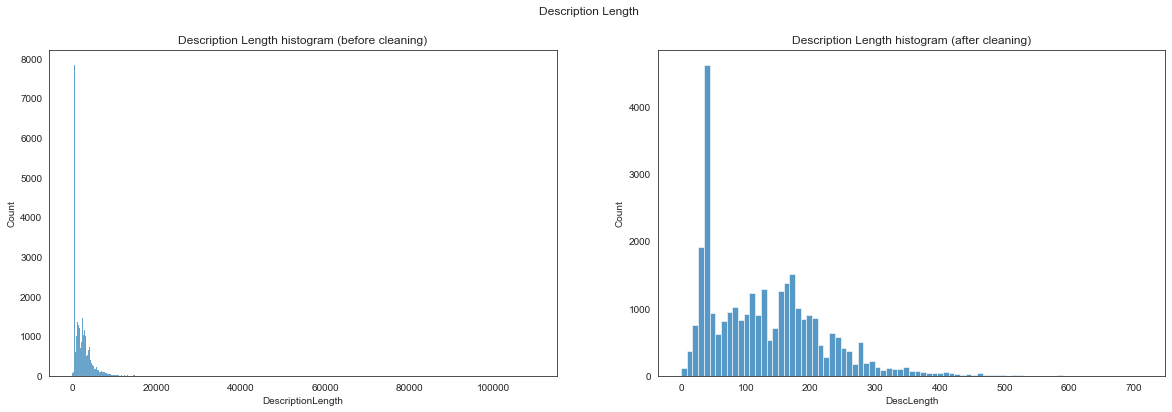

In [85]:
fig, axes = plt.subplots(1,2, figsize=(20,6))

# both subplots title
fig.suptitle('Description Length')

# plot1 object
sns.histplot(df['DescriptionLength'],ax=axes[0])
axes[0].set_title('Description Length histogram (before cleaning)')

# plot2 object
sns.histplot(df['DescLength'],ax=axes[1])
axes[1].set_title('Description Length histogram (after cleaning)')

# show plot
plt.show()

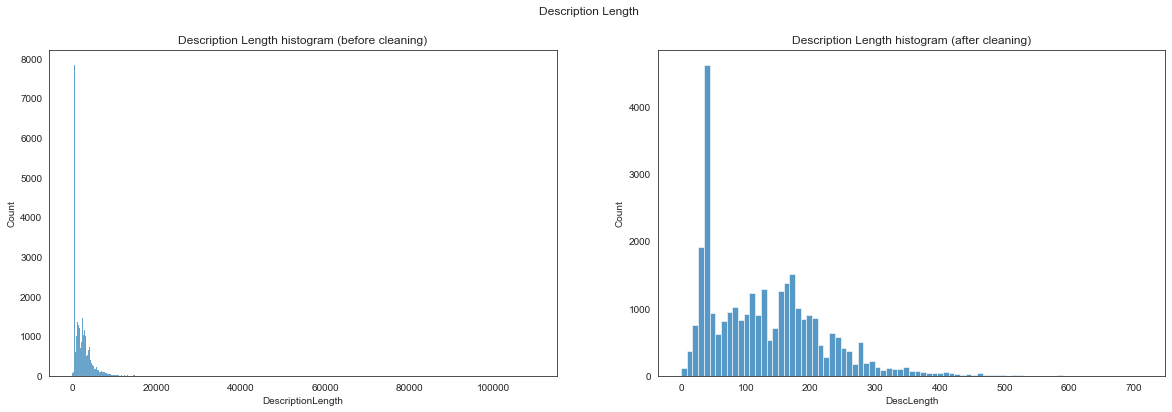

In [85]:
fig, axes = plt.subplots(1,2, figsize=(20,6))

# both subplots title
fig.suptitle('Description Length')

# plot1 object
sns.histplot(df['DescriptionLength'],ax=axes[0])
axes[0].set_title('Description Length histogram (before cleaning)')

# plot2 object
sns.histplot(df['DescLength'],ax=axes[1])
axes[1].set_title('Description Length histogram (after cleaning)')

# show plot
plt.show()

In [86]:
df.describe()

,DescLength,DescriptionLength
count,31426.000000,31426.000000
mean,131.313276,2481.080411
std,88.886372,2571.633684
min,0.000000,7.000000
25%,45.000000,512.000000
50%,121.000000,1983.000000
75%,184.000000,3269.000000
max,713.000000,109550.000000


In [86]:
df.describe()

,DescLength,DescriptionLength
count,31426.000000,31426.000000
mean,131.313276,2481.080411
std,88.886372,2571.633684
min,0.000000,7.000000
25%,45.000000,512.000000
50%,121.000000,1983.000000
75%,184.000000,3269.000000
max,713.000000,109550.000000


In [87]:
df[df.DescLength <=0]

,ExtJobTitleText,JobTitle,Description,Desc,DescLength,DescriptionLength
7418,CDL Class A Driver | Paid Weekly | Valencia CA,Pick Up and Delivery Driver,#ont123,[],0,7
7811,Local CDL A Truck Driver | Home Daily | Albuquerque NM,Pick Up and Delivery Driver,#phx123,[],0,7
26166,Maintenance Mechanic,Maintenance Mechanic,<html><body></body></html>,[],0,26
27547,Mi Sourcing,0000,<p><br/></p>,[],0,12
27898,CDL Drivers,Class A Driver,"<div class=""MSWordContent"" style=""display: inline;""><div class=""MSWordContent"" style=""display: inline;""><div class=""OutlineElement Ltr SCXW1350165...",[],0,512


In [87]:
df[df.DescLength <=0]

,ExtJobTitleText,JobTitle,Description,Desc,DescLength,DescriptionLength
7418,CDL Class A Driver | Paid Weekly | Valencia CA,Pick Up and Delivery Driver,#ont123,[],0,7
7811,Local CDL A Truck Driver | Home Daily | Albuquerque NM,Pick Up and Delivery Driver,#phx123,[],0,7
26166,Maintenance Mechanic,Maintenance Mechanic,<html><body></body></html>,[],0,26
27547,Mi Sourcing,0000,<p><br/></p>,[],0,12
27898,CDL Drivers,Class A Driver,"<div class=""MSWordContent"" style=""display: inline;""><div class=""MSWordContent"" style=""display: inline;""><div class=""OutlineElement Ltr SCXW1350165...",[],0,512


In [88]:
df = df[df.DescLength > 0]

In [88]:
df = df[df.DescLength > 0]

In [89]:
df[df.JobTitle == '0000']

,ExtJobTitleText,JobTitle,Description,Desc,DescLength,DescriptionLength
13,Independent Operator,0000,"<div class=""earcu_posdescriptionContainer""><div class=""earcu_posdescription""><div class=""earcu_posdescriptionnote""><p><strong>DRIVE YOUR OWN BUSIN...","[work, goal, franchise, cars, must, operation, drive, boss, takes, maintain, posting, supporting, employees, submit, travel, description, group, o...",137,2943
47,Behavioral Health Activity Therapist,0000,"<p style=""margin: 0in 0in 8pt;""><span style=""font-family: 'Verdana',sans-serif; font-size: 9pt;"">At Corizon Health, we share a common bond to deli...","[work, difference, life, check, may, levels, vision, help, clearance, early, choose, field, share, inmate, development, least, take, humanity, wel...",153,3465
255,Family Medicine NP/PA - Locum Tenens - Southern California,0000,"<p><span style=""font-size:14px"">Locums FP NP/PA need at a clinic 2 hours East of San Diego for the dates of 12/23 - 1/3</span></p>\n\n<ul>\n\t<li...","[credentialing, emr, pecos, fp, md, must, alumni, practice, need, availability, nalto, hours, travel, member, expenses, rated, pa, f, staff, direc...",42,1029
261,Physician Only - Maternal Fetal Medicine Locums Need with NYC Hospital - Part-Time - $2k Per Day,0000,<p><strong><u>Alumni Healthcare Staffing - </u></strong><strong><u>Maternal Fetal Medicine – NYC Locum Tenens:</u></strong></p>\n\n<ul>\n\t<li><st...,"[locum, imaging, credentialing, diagnostic, dopplers, w, umbilical, –, nt, alumni, medicine, per, availability, nalto, travel, fetal, level, membe...",47,727
262,Full Time ER and Outpatient C/A Psychiatry Locums Need in Connecticut,0000,<p> </p>\n\n<ul>\n\t<li>Immediate start date</li>\n\t<li>Must be board certified</li>\n\t<li>M-F</li>\n\t<li>ER and Outpatient Child/Adol</li>\n\t...,"[beds, available, date, must, month, er, guaranteed, midlevel, coordinated, nalto, travel, member, rated, service, child, immediate, f, direct, bo...",37,532
...,...,...,...,...,...,...
31126,Senior Designer,0000,"<br> </p> Our client is a rapidly-growing agency specializing in developing innovative branding, marketing, and customer experience solutions for ...","[work, impactful, apply, digital, candidates, local, new, person, city, innovative, marketing, onsit, growing, solutions, campaigns, branding, exp...",43,512
31148,Warehouse Clerical Support,0000,"<p>Top Job</p> <p>Located in Saint Cloud, MN</p> <p>Salary: $17-$18/hour</p> <p><p>Express Employment Professionals is now hiring for <strong>Ware...","[parts, work, local, hiring, ms, working, excel, knowledge, keeping, put, professionals, located, pace, job, prioritizing, bluestem, area, compute...",41,512
31197,Learning Disabilities Teacher-Consultant - Short Term,0000,"<p><i style=""font-size: 10pt; font-family: Cambria, serif; color: black;"">We’re looking for an exceptional </i><b style=""font-size: 10pt; font-fam...","[learning, ldtc, englishtown, exceptional, nove, september, time, we’re, position, consultant, full, looking, nj, teacher, disabilities]",15,512
31357,Test Job 12,0000,<BR><BR> Internal ID: a0x3r00000K65b2AAB,"[internal, id]",2,40


In [89]:
df[df.JobTitle == '0000']

,ExtJobTitleText,JobTitle,Description,Desc,DescLength,DescriptionLength
13,Independent Operator,0000,"<div class=""earcu_posdescriptionContainer""><div class=""earcu_posdescription""><div class=""earcu_posdescriptionnote""><p><strong>DRIVE YOUR OWN BUSIN...","[work, goal, franchise, cars, must, operation, drive, boss, takes, maintain, posting, supporting, employees, submit, travel, description, group, o...",137,2943
47,Behavioral Health Activity Therapist,0000,"<p style=""margin: 0in 0in 8pt;""><span style=""font-family: 'Verdana',sans-serif; font-size: 9pt;"">At Corizon Health, we share a common bond to deli...","[work, difference, life, check, may, levels, vision, help, clearance, early, choose, field, share, inmate, development, least, take, humanity, wel...",153,3465
255,Family Medicine NP/PA - Locum Tenens - Southern California,0000,"<p><span style=""font-size:14px"">Locums FP NP/PA need at a clinic 2 hours East of San Diego for the dates of 12/23 - 1/3</span></p>\n\n<ul>\n\t<li...","[credentialing, emr, pecos, fp, md, must, alumni, practice, need, availability, nalto, hours, travel, member, expenses, rated, pa, f, staff, direc...",42,1029
261,Physician Only - Maternal Fetal Medicine Locums Need with NYC Hospital - Part-Time - $2k Per Day,0000,<p><strong><u>Alumni Healthcare Staffing - </u></strong><strong><u>Maternal Fetal Medicine – NYC Locum Tenens:</u></strong></p>\n\n<ul>\n\t<li><st...,"[locum, imaging, credentialing, diagnostic, dopplers, w, umbilical, –, nt, alumni, medicine, per, availability, nalto, travel, fetal, level, membe...",47,727
262,Full Time ER and Outpatient C/A Psychiatry Locums Need in Connecticut,0000,<p> </p>\n\n<ul>\n\t<li>Immediate start date</li>\n\t<li>Must be board certified</li>\n\t<li>M-F</li>\n\t<li>ER and Outpatient Child/Adol</li>\n\t...,"[beds, available, date, must, month, er, guaranteed, midlevel, coordinated, nalto, travel, member, rated, service, child, immediate, f, direct, bo...",37,532
...,...,...,...,...,...,...
31126,Senior Designer,0000,"<br> </p> Our client is a rapidly-growing agency specializing in developing innovative branding, marketing, and customer experience solutions for ...","[work, impactful, apply, digital, candidates, local, new, person, city, innovative, marketing, onsit, growing, solutions, campaigns, branding, exp...",43,512
31148,Warehouse Clerical Support,0000,"<p>Top Job</p> <p>Located in Saint Cloud, MN</p> <p>Salary: $17-$18/hour</p> <p><p>Express Employment Professionals is now hiring for <strong>Ware...","[parts, work, local, hiring, ms, working, excel, knowledge, keeping, put, professionals, located, pace, job, prioritizing, bluestem, area, compute...",41,512
31197,Learning Disabilities Teacher-Consultant - Short Term,0000,"<p><i style=""font-size: 10pt; font-family: Cambria, serif; color: black;"">We’re looking for an exceptional </i><b style=""font-size: 10pt; font-fam...","[learning, ldtc, englishtown, exceptional, nove, september, time, we’re, position, consultant, full, looking, nj, teacher, disabilities]",15,512
31357,Test Job 12,0000,<BR><BR> Internal ID: a0x3r00000K65b2AAB,"[internal, id]",2,40


In [90]:
df[df.JobTitle == '0']

,ExtJobTitleText,JobTitle,Description,Desc,DescLength,DescriptionLength


#### We can not know, what the real job title is for these, so they are just as useless as NA, let's drop them.

In [91]:
df = df[df.JobTitle != '0000']
df = df[df.JobTitle != '0']

#### Let's take another look at the df metrics:

In [92]:
df.describe()

,DescLength,DescriptionLength
count,30673.00000,30673.000000
mean,131.33818,2482.968148
std,88.72128,2578.250691
min,1.00000,19.000000
25%,45.00000,512.000000
50%,121.00000,1986.000000
75%,184.00000,3270.000000
max,713.00000,109550.000000


## Checking if the Jobtitle apears in the Descriprion column

In [103]:
df['is_extractive'] = df.apply(lambda row: row.JobTitle.lower() in row.Description.lower(), axis=1)

In [104]:
df.is_extractive.value_counts()

False    20285
True     10388
Name: is_extractive, dtype: int64